# Aula 10 -  Streamlit II

## 10.1 Session state
Toda vez que um aplicativo é atualizado, todo o conteúdo das variáveis criadas são zerados. Um aplicativo é atualizado sempre que há uma alteração nos seus elementos: um botão é clicado, um radio button selecionado, etc. Para manter variáveis persistentes entre uma atualização e outra devemos usar a *Session state*.

Session state pode ser pensado como um dicionário que mantém as variávieis que não devem ser apagadas. Acessamos esse dicionário por `st.session_state`. Considere o código abaixo, que imprime esse dicionário:

In [ ]:
import streamlit as st

st.session_state

Note que nada é impresso na tela, pois o dicionário está vazio. Podemos inserir elementos da mesma forma como fazemos com os dicionário:

In [ ]:
import streamlit as st

st.session_state["v1"] = 1
st.session_state["l1"] = [1,2,3,4]
st.session_state["s1"] = "Sou uma string"
st.session_state

Dessa forma conseguimos manter a persistencia de dados na aplicação. Considere o código abaixo, que mantém um contador de quantas vezes um botão foi pressionado.

In [ ]:
import streamlit as st


if "n" not in st.session_state: # Verificando se a chave já não está inserida
    st.session_state["n"] = 0

'''
# Aplicativo pressione o botão
'''
btn_press = st.button("Contador")
if btn_press:
    st.write("O botão já foi pressionado ", st.session_state["n"], " vezes até o momento.")
    st.session_state["n"] = st.session_state["n"] + 1

Também podemos adicionar *widgets* ao Session state, para isso precisamos passar uma *key* ao widget na sua criação. Essa key é o acesso do Session state. Considere o código abaixo que armazena o estado de um radio button no session state:

## 10.2 Exemplos
Os aplicativos abaixo mostram alguns exemplos:

### 10.2.1 Leitura de dados
O aplicativo abaixo lê um conjunto de dados, mostra as colunas como um groupbox, e de acordo com a coluna seleciona, agrupa os valores do dataframe, mostrando em uma tabela e em um gráfico:

In [ ]:
from requests import session
import streamlit as st
import pandas as pd

'''
# Aplicativo de visualização
Selecione um arquivo para começar a visualização. Note que o arquivo pode ser re-selecionado
diversas vezes.
'''

uploaded_file = st.file_uploader("Escolha um arquivo :", key = "file")
if uploaded_file is not None:
    st.session_state["dt"] = pd.read_csv(st.session_state["file"])

if "dt" in st.session_state:
    st.session_state["dt"]

'''
Agora, mostramos todas as colunas como um combobox
'''

if "dt" in st.session_state:
    rdb_disc = st.radio(
        "Qual a sua disciplina favorita na faculdade?",
         [c for c in st.session_state["dt"].columns],
         key = "col")

'''
Agora, criamos um novo dataframe, aplicando o `groupby` na coluna selecionada.
'''

if "dt" in st.session_state:
    st.session_state["dt_grouped"] = st.session_state["dt"].groupby(st.session_state["col"]).sum()
    st.session_state["dt_grouped"]

'''
Finalmente, criamos um gráfico com os valores agrupados no dataframe
'''

if "dt" in st.session_state:
    st.line_chart(st.session_state["dt_grouped"])

<div style="background-color:gray">
    <h1 style = "text-align:center; color:white"> Exercícios</h1>
</div>

1. Crie um aplicativo que leia um conjunto de dados (apropriado para classificação, como o banco de Iris),e estime um classificador, mostrando a imagem da árvore gerada. Crie também, usando widgets, possibilidades para alterar os parâmetros da geração da árvore (como profundidade máxima, tipo de 'split', etc), de tal forma que toda vez que um parâmetro for alterado, a árvore deve ser criada novamente, bem como a imagem plotada. Além disso, adicione a possibilidade do usuário selecionar um conjunto de dados para realizar a classificação, use a árvore para classificar os dados e mostrar o resultado novamente.

2. Crie um aplicativo que leia um banco de dados preparado para a extração de regras de decisão (você pode decidir o formato do arquivo, ou ainda deixar o usuário definir). O aplicativo deve extrair regras de assiciação dos dados e informá-las ao usuário. Além disso, devem existir opções de input do usuário para os parâmetros de suporte e confiança mínimos. De forma que sempre que o usuário alterar esses parâmetros, as regras são novamente extraídas.

## 10.3 Deploy de aplicativos

Após a criação dos aplicativos, podemos disponibilizá-los para que outros usuários os usem de forma remota. Para isso é necessário uma conta no *github* e outra em alguma plataforma/servidor, como o próprio streamlit cloud (https://streamlit.io/cloud) (ou heroku).

Como o código será executado em uma máquina online, precisamos informar quais pacotes python o nosso aplicativo precisa. Fazemos isso criando um arquivo .txt na mesma pasta em que o arquivo principal está contido, com uma lista de pacotes e suas versões. Podemos ver a versão do pacote com o comando 

`pip -list`

Um exemplo de arquivo com o pacote pandas fica da seguinte forma (o arquivo **deve** ter o nome *requirements.txt*):


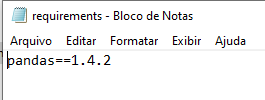

### 10.3.1 Git e github


*Git* é um sistema de controle de versões de código, usado para atualização, sincronização e trabalho em equipe de um mesmo arquivo. Em sua forma básica, podemos usar o *git* individualmente para salvar nossos códigos em um repositório an web.

#### Cadastro no github
Um desses repósitorios é o *github* (https://github.com/), sendo que o primeiro passo é criar um usuário no site. Com um usuário criado, podemos fazer o upload de nossos códigos para um *repositorio*. Para isso, precisamos também de um programa que faça isso instalado no nosso computador.

#### *Git for windows*
Baixar o programa git for windows em https://gitforwindows.org/.

#### Criando um repósitório online
Para fazermos o upload de nossos códigos no github, primeiro precisamos criar um repósitório no mesmo. Ao acessar o site, clicar no botão *new* no canto esquerdo da tela

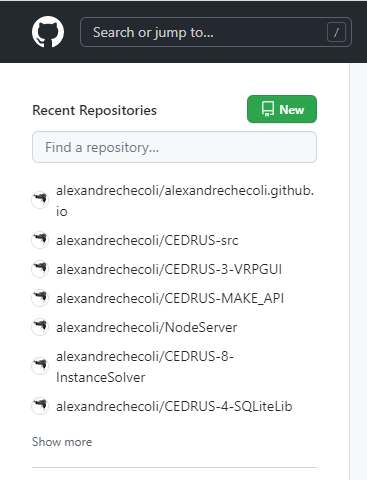

Em seguida precisamos fornecer um nome para o repósitorio, e clicar no botão *Create repository*.

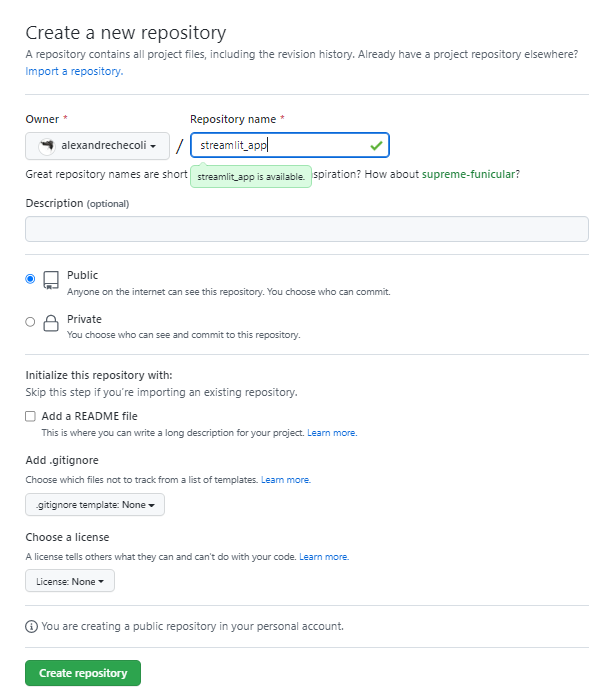

Com isso o repósitorio já está criado, e um caminho de acesso é fornecido. Esse caminho será usado para fazermos o upload de nossos arquivos no repositório.

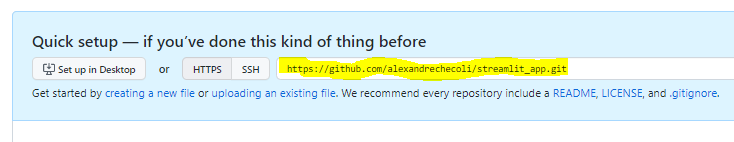
#### Criando um repositório localmente

Agora precisamos criar um repósitorio local na pasta que contém o nosso aplicativo, usando o programa que *Git for windows*. Para isso, procure nos aplicativos do computador *Git bash*. Como é a primeira vez que usamos o aplicativo, é necessário configurar o usuário e e-mail (só na primeira vez de uso). Para isso digite os seguintes comandos no bash:

`git config --global user.mail "<seu_@email.com>"`

`git config --global user.name "seu nome de usuário""`

Agora, precisamos criar o repositório localmente, na pasta em que está o nosso aplicativo.
Com o prompt de comando aberto, mova-o para a pasta em que está o aplicativo com o comando:

`cd "<caminho_para_a_pasta>"`

Em seguida, iniciamos um repositório git com o comando:

`git init`

Com o repositório aberto adicionamos todos os documentos com os seguintes comandos:

`git add .`

`git commit -m "alguma mensagem"`

Finalmente, podemos inserir o caminho do nosso repósitório na web, que armazenará os arquivos após o upload, com o comando:

`git remote add origin "caminho_mostrado_na_criação_do_repositorio_github"`

E fazer o upload para o repósitório web:

`git push origin master`

Se tudo der certo, acessando o repósitório veremos que os arquivos já estão disponíveis.

#### Importando o aplicativo em um servidor

Agora, com todos os arquivos no Github podemos criar uma conta no Streamlit cloud, que disponibilizará a aplicação (https://streamlit.io/cloud).

Após criar uma conta, clique em `new app`.


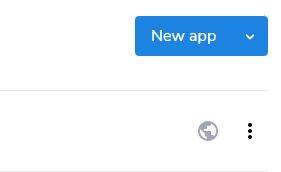

Com isso, será requisitado que uma integração com a conta do Github seja feita. Logo em seguida poderemos selecionar qual repositório e qual aplicativo queremos fazer o deploy. Se tudo der certo, o aplicativo já estará disponível para todos, basta compartilhar o link.